In [39]:


import card
import mask
import pdf
import preprocess

symbols_folder = "data/symbols_clo"
square_symbols_folder = "data/square_symbols"
masks_folder = "data/masks"
cards_folder = "data/cards"
print_folder = "data/print"

In [40]:


import math
import os

import cv2
import img2pdf
import numpy as np
from tqdm import tqdm

from utils import new_folder

In [41]:

print_folder = "data/print"

out_print_folder=print_folder
card_size_cm = 8.2

In [42]:
names = [f.name for f in os.scandir(cards_folder)]
assert len(names) == 57
names += [None]  # Pad to have an even size

pdf_path = os.path.join(out_print_folder, "cards.pdf")
batches_folder = os.path.join(out_print_folder, "batches")
new_folder(batches_folder)

first_img = cv2.imread(os.path.join(cards_folder, names[0]))
card_size_pix = first_img.shape[0]
pix_per_cm = float(card_size_pix) / card_size_cm
w_a4_cm = 21.0
h_a4_cm = 29.7

w_num_pix = math.floor(w_a4_cm * pix_per_cm)
h_num_pix = math.floor(h_a4_cm * pix_per_cm)

# get maximum number of patch to add in the final image
nb_patch_in_w = math.floor(w_num_pix / card_size_pix)
nb_patch_in_h = math.floor(h_num_pix / card_size_pix)

print(nb_patch_in_w, nb_patch_in_h)

w_pad = w_num_pix-card_size_pix * nb_patch_in_w
h_pad = h_num_pix-card_size_pix * nb_patch_in_h

print("pad", w_pad, h_pad)

assert w_pad > 0 and h_pad > 0


dw = int(w_pad/(1+nb_patch_in_w))
print("dw", dw)
w_patch = 255*np.ones((card_size_pix, dw, 3), np.uint8)
w_patch_right = 255*np.ones((card_size_pix, w_pad-(dw*nb_patch_in_w), 3), np.uint8)

dh = int(h_pad/(1+nb_patch_in_h))
h_patch = 255*np.ones((dh, w_num_pix, 3), np.uint8)
h_patch_bot = 255*np.ones((h_pad-(dh*nb_patch_in_h), w_num_pix, 3), np.uint8)

print(h_patch.shape, h_patch_bot.shape)

print(w_patch.shape, w_patch_right.shape)

nb_patch_per_batch = nb_patch_in_w*nb_patch_in_h
nb_of_batch = math.ceil(len(names)/(nb_patch_per_batch))
print(nb_of_batch)
batches_paths = []
for k in tqdm(range(nb_of_batch), "Batch cards"):
    batch_path = os.path.join(batches_folder, f"batch_cards_{k}.png")

    batch_images = [cv2.imread(os.path.join(cards_folder, name))
                    if name is not None else 255*np.ones_like(first_img)
                    for name in names[nb_patch_per_batch*k:nb_patch_per_batch*k+nb_patch_per_batch]]

    columns = []
    for column in range(nb_patch_in_h):
        columns.append(h_patch)
        temp_line = []
        for line in range(nb_patch_in_w):
            temp_line.append(w_patch)
            idx = line*nb_patch_in_h+column
            if idx < len(batch_images):
                temp_line.append(batch_images[idx])
            else: # if no more cards to add, pad with white
                temp_line.append(255*np.ones_like(first_img))
        temp_line.append(w_patch_right)
        batch_img = cv2.hconcat(temp_line)
        print("line", batch_img.shape)
        columns.append(batch_img)

    columns.append(h_patch_bot)
    batch_img = cv2.vconcat(columns)
    print("column", batch_img.shape)
    cv2.imwrite(batch_path, batch_img)
    batches_paths.append(batch_path)

a4inpt = (img2pdf.mm_to_pt(210), img2pdf.mm_to_pt(297))
layout_fun = img2pdf.get_layout_fun(a4inpt)
with open(pdf_path, "wb") as f:
    f.write(img2pdf.convert(batches_paths, layout_fun=layout_fun))


2 3
pad 1682 1865
dw 560
(466, 7682, 3) (467, 7682, 3)
(3000, 560, 3) (3000, 562, 3)
10


Batch cards:   0%|          | 0/10 [00:00<?, ?it/s]

line (3000, 7682, 3)
line (3000, 7682, 3)
line (3000, 7682, 3)
column (10865, 7682, 3)


Batch cards:  10%|█         | 1/10 [00:00<00:07,  1.23it/s]

line (3000, 7682, 3)
line (3000, 7682, 3)
line (3000, 7682, 3)
column (10865, 7682, 3)


Batch cards:  20%|██        | 2/10 [00:01<00:06,  1.22it/s]

line (3000, 7682, 3)
line (3000, 7682, 3)
line (3000, 7682, 3)
column (10865, 7682, 3)


Batch cards:  30%|███       | 3/10 [00:02<00:05,  1.21it/s]

line (3000, 7682, 3)
line (3000, 7682, 3)
line (3000, 7682, 3)
column (10865, 7682, 3)


Batch cards:  40%|████      | 4/10 [00:03<00:04,  1.21it/s]

line (3000, 7682, 3)
line (3000, 7682, 3)
line (3000, 7682, 3)
column (10865, 7682, 3)


Batch cards:  50%|█████     | 5/10 [00:04<00:04,  1.19it/s]

line (3000, 7682, 3)
line (3000, 7682, 3)
line (3000, 7682, 3)
column (10865, 7682, 3)


Batch cards:  60%|██████    | 6/10 [00:04<00:03,  1.21it/s]

line (3000, 7682, 3)
line (3000, 7682, 3)
line (3000, 7682, 3)
column (10865, 7682, 3)


Batch cards:  70%|███████   | 7/10 [00:05<00:02,  1.21it/s]

line (3000, 7682, 3)
line (3000, 7682, 3)
line (3000, 7682, 3)
column (10865, 7682, 3)


Batch cards:  80%|████████  | 8/10 [00:06<00:01,  1.21it/s]

line (3000, 7682, 3)
line (3000, 7682, 3)
line (3000, 7682, 3)
column (10865, 7682, 3)


Batch cards:  90%|█████████ | 9/10 [00:07<00:00,  1.21it/s]

line (3000, 7682, 3)
line (3000, 7682, 3)
line (3000, 7682, 3)
column (10865, 7682, 3)


Batch cards: 100%|██████████| 10/10 [00:08<00:00,  1.24it/s]


In [43]:
import glob


back = sorted(glob.glob("data/print_bak/batches/*"), key=lambda x: int(x.split("_")[-1].split(".")[0]))

In [36]:
back

['data/print_bak/batches/batch_cards_0.png',
 'data/print_bak/batches/batch_cards_1.png',
 'data/print_bak/batches/batch_cards_2.png',
 'data/print_bak/batches/batch_cards_3.png',
 'data/print_bak/batches/batch_cards_4.png',
 'data/print_bak/batches/batch_cards_5.png',
 'data/print_bak/batches/batch_cards_6.png',
 'data/print_bak/batches/batch_cards_7.png',
 'data/print_bak/batches/batch_cards_8.png',
 'data/print_bak/batches/batch_cards_9.png']

In [44]:
# mix back and front
new = []

for i, path in enumerate(back):
    print(i, back[i], batches_paths[i])
    new.append(batches_paths[i])
    new.append(back[i])

print(new)

0 data/print_bak/batches/batch_cards_0.png data/print/batches/batch_cards_0.png
1 data/print_bak/batches/batch_cards_1.png data/print/batches/batch_cards_1.png
2 data/print_bak/batches/batch_cards_2.png data/print/batches/batch_cards_2.png
3 data/print_bak/batches/batch_cards_3.png data/print/batches/batch_cards_3.png
4 data/print_bak/batches/batch_cards_4.png data/print/batches/batch_cards_4.png
5 data/print_bak/batches/batch_cards_5.png data/print/batches/batch_cards_5.png
6 data/print_bak/batches/batch_cards_6.png data/print/batches/batch_cards_6.png
7 data/print_bak/batches/batch_cards_7.png data/print/batches/batch_cards_7.png
8 data/print_bak/batches/batch_cards_8.png data/print/batches/batch_cards_8.png
9 data/print_bak/batches/batch_cards_9.png data/print/batches/batch_cards_9.png
['data/print/batches/batch_cards_0.png', 'data/print_bak/batches/batch_cards_0.png', 'data/print/batches/batch_cards_1.png', 'data/print_bak/batches/batch_cards_1.png', 'data/print/batches/batch_cards

In [45]:
import glob


a4inpt = (img2pdf.mm_to_pt(210), img2pdf.mm_to_pt(297))
layout_fun = img2pdf.get_layout_fun(a4inpt)
with open(pdf_path, "wb") as f:
    f.write(img2pdf.convert(new, layout_fun=layout_fun))

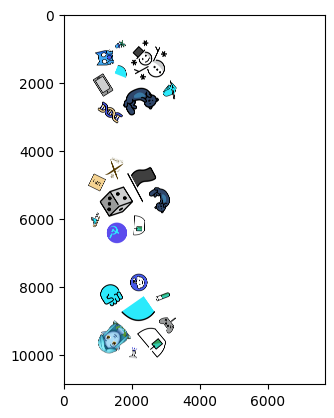

In [9]:
#show batch img

from matplotlib import pyplot as plt

# show rgb image
plt.imshow(batch_img)